 # Data Loading and Inspection
 
1 Load the CSV file using pandas.

2 Display the first and last 5 rows of the dataset.

3 Check the shape of the dataset (rows and columns).

4 Inspect column data types and identify any potential issues.

5 Verify whether the dataset contains missing values.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_performance.csv')
print(df.head())

   student_id  hours_studied  attendance_rate  math_score  science_score  \
0           1              6             0.74          59             49   
1           2              3             0.71          73             66   
2           3             12             0.82          80             40   
3           4             14             0.66          72             49   
4           5             10             0.92          85             89   

   gender  
0    Male  
1  Female  
2  Female  
3    Male  
4    Male  


In [3]:
df.shape

(120, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       120 non-null    int64  
 1   hours_studied    120 non-null    int64  
 2   attendance_rate  120 non-null    float64
 3   math_score       120 non-null    int64  
 4   science_score    120 non-null    int64  
 5   gender           120 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 5.8+ KB


In [5]:
print(df.isnull())

     student_id  hours_studied  attendance_rate  math_score  science_score  \
0         False          False            False       False          False   
1         False          False            False       False          False   
2         False          False            False       False          False   
3         False          False            False       False          False   
4         False          False            False       False          False   
..          ...            ...              ...         ...            ...   
115       False          False            False       False          False   
116       False          False            False       False          False   
117       False          False            False       False          False   
118       False          False            False       False          False   
119       False          False            False       False          False   

     gender  
0     False  
1     False  
2     False  
3     F

# Descriptive Statistics and NumPy Operations

1 Use NumPy to compute the mean, median, and standard deviation of math_score.

2 Calculate the average science score using NumPy.

3 Find the minimum and maximum values for hours_studied.

4 Determine the correlation between math_score and science_score.

5 Identify how many students studied more than 10 hours per week.

In [6]:
print(np.sum(df['math_score']))
print(np.mean(df['math_score']))
print(np.median(df['math_score']))
print(np.std(df['math_score']))


8111
67.59166666666667
67.0
14.590805228712437


In [7]:
print(np.mean(df['science_score']))

69.81666666666666


In [8]:
print(np.min(df['hours_studied']))
print(np.max(df['hours_studied']))

0
14


In [9]:
# select rows where hours_studied > 10
student_studied = df[df['hours_studied'] > 10].value_counts()
print(student_studied)

student_id  hours_studied  attendance_rate  math_score  science_score  gender
3           12             0.82             80          40             Female    1
4           14             0.66             72          49             Male      1
76          11             0.75             67          61             Male      1
78          11             0.98             42          87             Male      1
79          12             0.70             67          39             Female    1
81          14             0.72             64          63             Male      1
83          13             0.61             38          58             Male      1
90          13             0.66             66          56             Male      1
96          12             0.70             77          68             Female    1
97          14             0.89             65          99             Female    1
100         11             0.85             55          94             Male      1
103      

 # Feature Engineering with pandas

1 Create a new column called average_score equal to the mean of math_score and
science_score.

2 Create a column called performance_level with values: Low (<50), Medium (50–74), High
(75+).

3 Count how many students fall into each performance_level category.

4 Compute the average hours studied per performance_level group.


In [10]:
df['average_score'] = df['math_score'] / df['science_score']

In [11]:
# compute average score as mean of math and science
df['average_score'] = df[['math_score', 'science_score']].mean(axis=1)

# assign performance level based on average_score
def _perf_level(s):
	if s < 50:
		return 'Low'
	elif s < 75:
		return 'Medium'
	else:
		return 'High'

df['performance_level'] = df['average_score'].apply(_perf_level)

In [12]:
# count students per performance level
df.groupby('performance_level')['student_id'].count()

performance_level
High      34
Low        3
Medium    83
Name: student_id, dtype: int64

In [13]:
# group by performance_level and compute mean hours_studied
df.groupby('performance_level')['hours_studied'].mean()

performance_level
High       7.735294
Low       10.000000
Medium     7.325301
Name: hours_studied, dtype: float64

#  Data Visualization with seaborn

1 Plot the distribution of math scores using a histogram.

2 Create a boxplot comparing math scores by gender.

3 Plot the distribution of average_score.

4 Visualize the relationship between attendance_rate and average_score using a scatter plot.

# 1 Plot the distribution of math scores using a histogram.

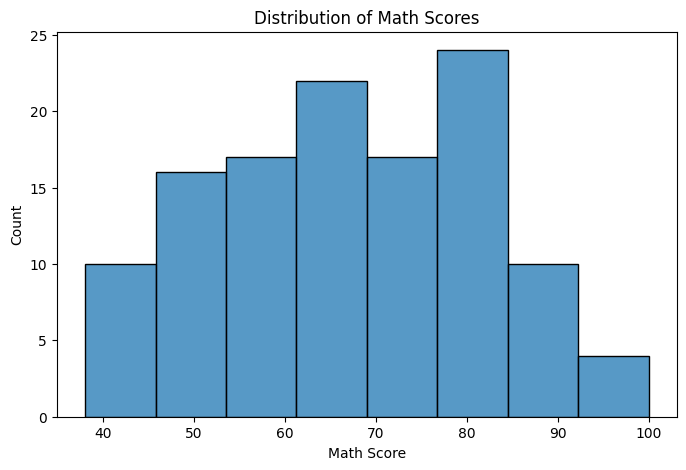

In [14]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df, x='math_score')

plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')

plt.show()


# 2 Create a boxplot comparing math scores by gender.

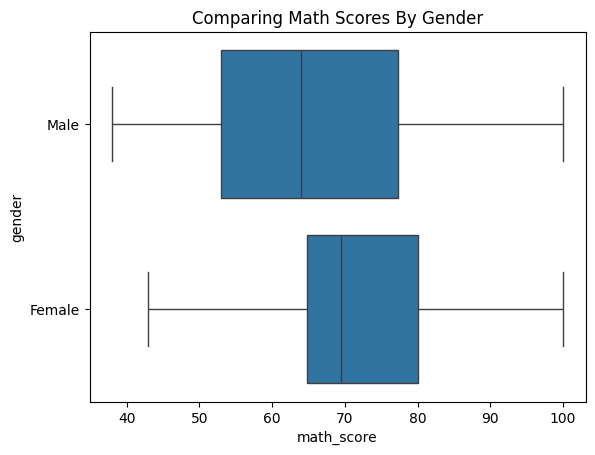

In [16]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=df, x = 'math_score', y = 'gender')
plt.title("Comparing Math Scores By Gender")
plt.xlabel('math_score')
plt.ylabel('gender')
plt.show()

# 3 Plot the distribution of average_score.

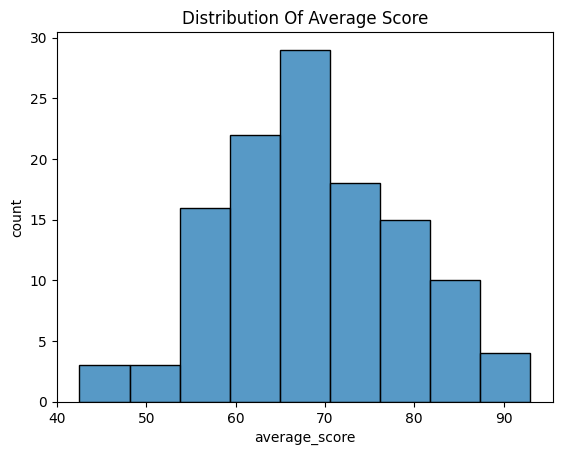

In [23]:
df['average_score'] = (df['math_score'] + df['science_score']) / 2

plt.Figure(figsize=(8,5))


sns.histplot(data=df,x = 'average_score' )

plt.title("Distribution Of Average Score")
plt.xlabel('average_score')
plt.ylabel('count')

plt.show()

# 4 Visualize the relationship between attendance_rate and average_score using a scatter plot.

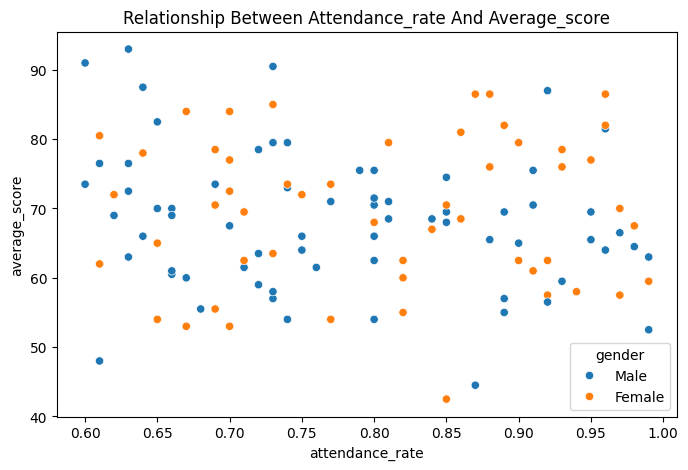

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, y='average_score', x='attendance_rate', hue='gender')
plt.title("Relationship Between Attendance_rate And Average_score")
plt.xlabel('attendance_rate')
plt.ylabel('average_score')

plt.show()

# Data Visualization with matplotlib

1 Create a scatter plot of hours_studied versus average_score.

2 Add axis labels, a title, and a grid to the plot.

3 Create a bar chart showing the average_score by gender.

4 Save one of your plots as an image file.

# 1 Create a scatter plot of hours_studied versus average_score.

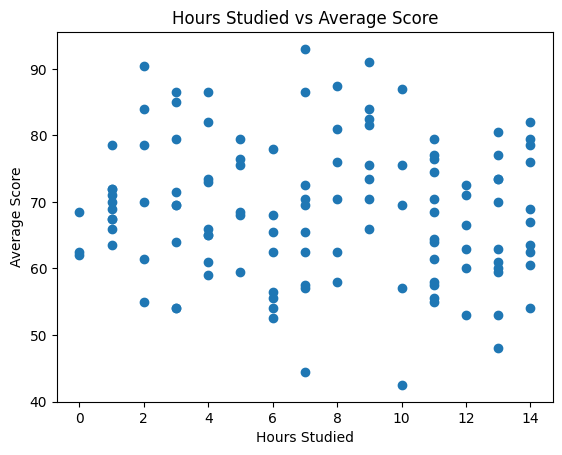

In [ ]:

plt.scatter(data=df, x = 'hours_studied', y= 'average_score')

# Labels and title
plt.xlabel("Hours Studied")
plt.ylabel("Average Score")
plt.title("Hours Studied vs Average Score")

# Show plot
plt.show()


# 2 Add axis labels, a title, and a grid to the plot.

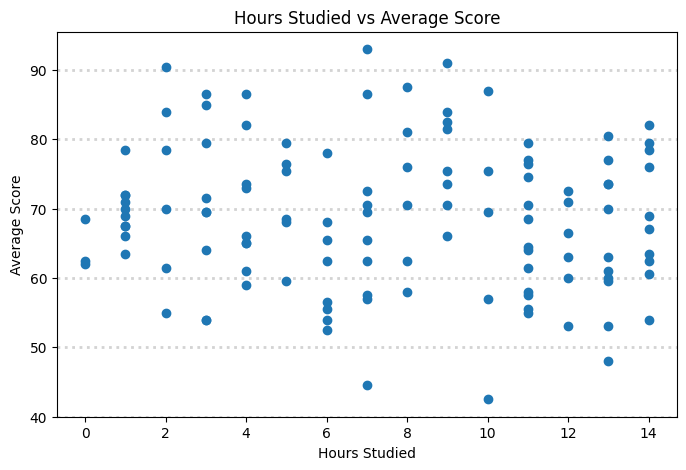

In [32]:
plt.figure(figsize=(8,5))
plt.grid(axis="y", 
         linewidth=2, 
         color="lightgray", 
         linestyle="dotted")

# use dataframe columns (correct names) instead of literal strings
plt.plot(df['hours_studied'], df['average_score'], marker='o', linestyle='', color='C0')

plt.xlabel('Hours Studied')
plt.ylabel('Average Score')
plt.title('Hours Studied vs Average Score')
plt.show()

# 3 Create a bar chart showing the average_score by gender.


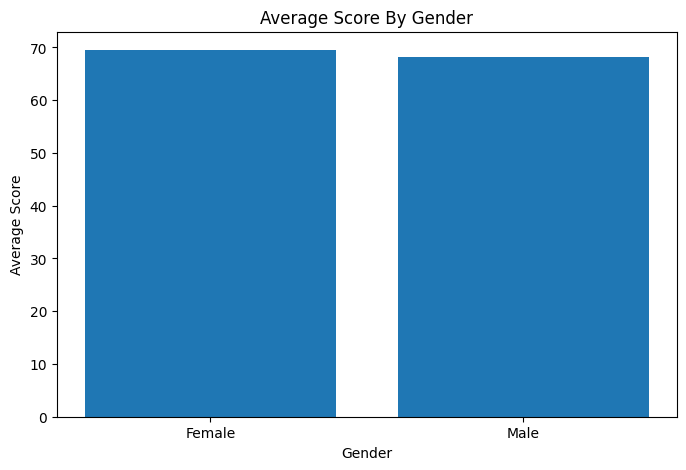

In [36]:
gender_means = df.groupby('gender')['average_score'].mean()

plt.figure(figsize=(8,5))
plt.bar(gender_means.index, gender_means.values)
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title("Average Score By Gender")
plt.xticks(rotation=0)
plt.show()

#  Analysis and Interpretation

# 1 Based on your analysis, does studying more hours generally lead to higher scores?

yes if you study more hours you will get higher scores and the prove is the scatter that we create scatter plot of hours_studied versus average_score .

# 2 Is attendance_rate strongly related to student performance?

yes.and the prove of that is the scatter plot the we create it shows us the relationship between attendance_rate and average_score

# 3 Are there noticeable differences in performance between genders?

The scatter plot illustrates the relationship between attendance rate and average score and shows a noticeable difference in performance between male and female students and we can see that because of the color in scatter plot Image also we can see that in the  bar chart showing the average_score by gender that we create 

